In [4]:
import acquire
import prepare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import warnings
import scipy

#import sklearn methods
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from ydata_profiling import ProfileReport as pr

import explore_utils

ModuleNotFoundError: No module named 'explore_utils'

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Find drivers for customer churn at Telco. Why are customers churning?

# Step 1. Plan

Follow the project specs at: https://ds.codeup.com/classification/project/

    OVERVIEW
    
    Business Goals
        Find drivers for customer churn at Telco. Why are customers churning?

        Construct a ML classification model that accurately predicts customer churn

        Present your process and findings to the lead data scientist
        
    Project Objectives

        Refine your work into a final report, in the form of a jupyter notebook, that shows the work you did, why,             goals, what you found, your methodologies, and your conclusions

        Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing,               modeling, and model evaluation), findings, and key takeaways in your report (notebook)

        Create modules (acquire.py, prepare.py) that make your process repeateable and your report (notebook) easy             to read and follow

        Ask exploratory questions of your data that will help you understand more about the attributes and drivers             of customers churning (answer questions through charts and statistical tests)

        Construct a model to predict customer churn using classification techniques, and make predictions for a               group of customers

        Walk through your report (notebook) in a 5 minute presentation with the lead data scientist

        Be prepared to answer panel questions about your code, process, findings and key takeaways, and model

            
            
Meet the rubric guidelines at: https://classroom.google.com/u/1/c/NjA0NTU0NTU3NzUz/a/NjA0NTU0NTU4MDgy/details?pli=1



# Step 2. Acquire

Acquire & Prepare Modules (.py)

contains functions to acquire, prepare and split your data. You can have other .py files if you desire to abstract other code away from your final report.

Your work must be reproducible by someone with their own env.py file.

Each of your functions are complimented with docstrings. If they are functions you borrowed from instructors, put those docstrings in your own words.

Functions to acquire and prepare your data should be imported and used in your final report.

In [ ]:
df = acquire.get_telco_data()

In [ ]:
df.head()

In [ ]:
df.churn

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.drop(columns='Unnamed: 0')

In [5]:
dummies

NameError: name 'dummies' is not defined

In [6]:
df

NameError: name 'df' is not defined

In [7]:
#month to month contracts seem to effect churn based on visualizations
dummies = pd.get_dummies(df.contract_type)
dummies = dummies.rename(columns = {'Month-to-month': 'contract_type_month_to_month'})
df['contract_type_month_to_month'] = dummies['contract_type_month_to_month']

NameError: name 'df' is not defined

In [8]:
df.contract_type_month_to_month.isnull().sum()

NameError: name 'df' is not defined

In [9]:
df.head()

NameError: name 'df' is not defined

# Step 3. Prepare

Acquire & Prepare Modules (.py)

contains functions to acquire, prepare and split your data. You can have other .py files if you desire to abstract other code away from your final report.

Your work must be reproducible by someone with their own env.py file.

Each of your functions are complimented with docstrings. If they are functions you borrowed from instructors, put those docstrings in your own words.

Functions to acquire and prepare your data should be imported and used in your final report.

In [10]:
train, validate, test = prepare.prep_telco_data(df)

NameError: name 'df' is not defined

In [11]:
train, validate, test

NameError: name 'train' is not defined

In [12]:
train.head()

NameError: name 'train' is not defined

In [13]:
train.columns

NameError: name 'train' is not defined

# Step 4. Exploratory Data Analysis

In [14]:
cat_cols, cont_cols = explore_utils.get_cat_and_cont_cols(train)

NameError: name 'explore_utils' is not defined

In [15]:
cont_cols

NameError: name 'cont_cols' is not defined

/Users/Scott/codeup-data-science/classification-exercises/classification_project/explore_utils.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
/Users/Scott/codeup-data-science/classification-exercises/classification_project/explore_utils.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, cmap='coolwarm',


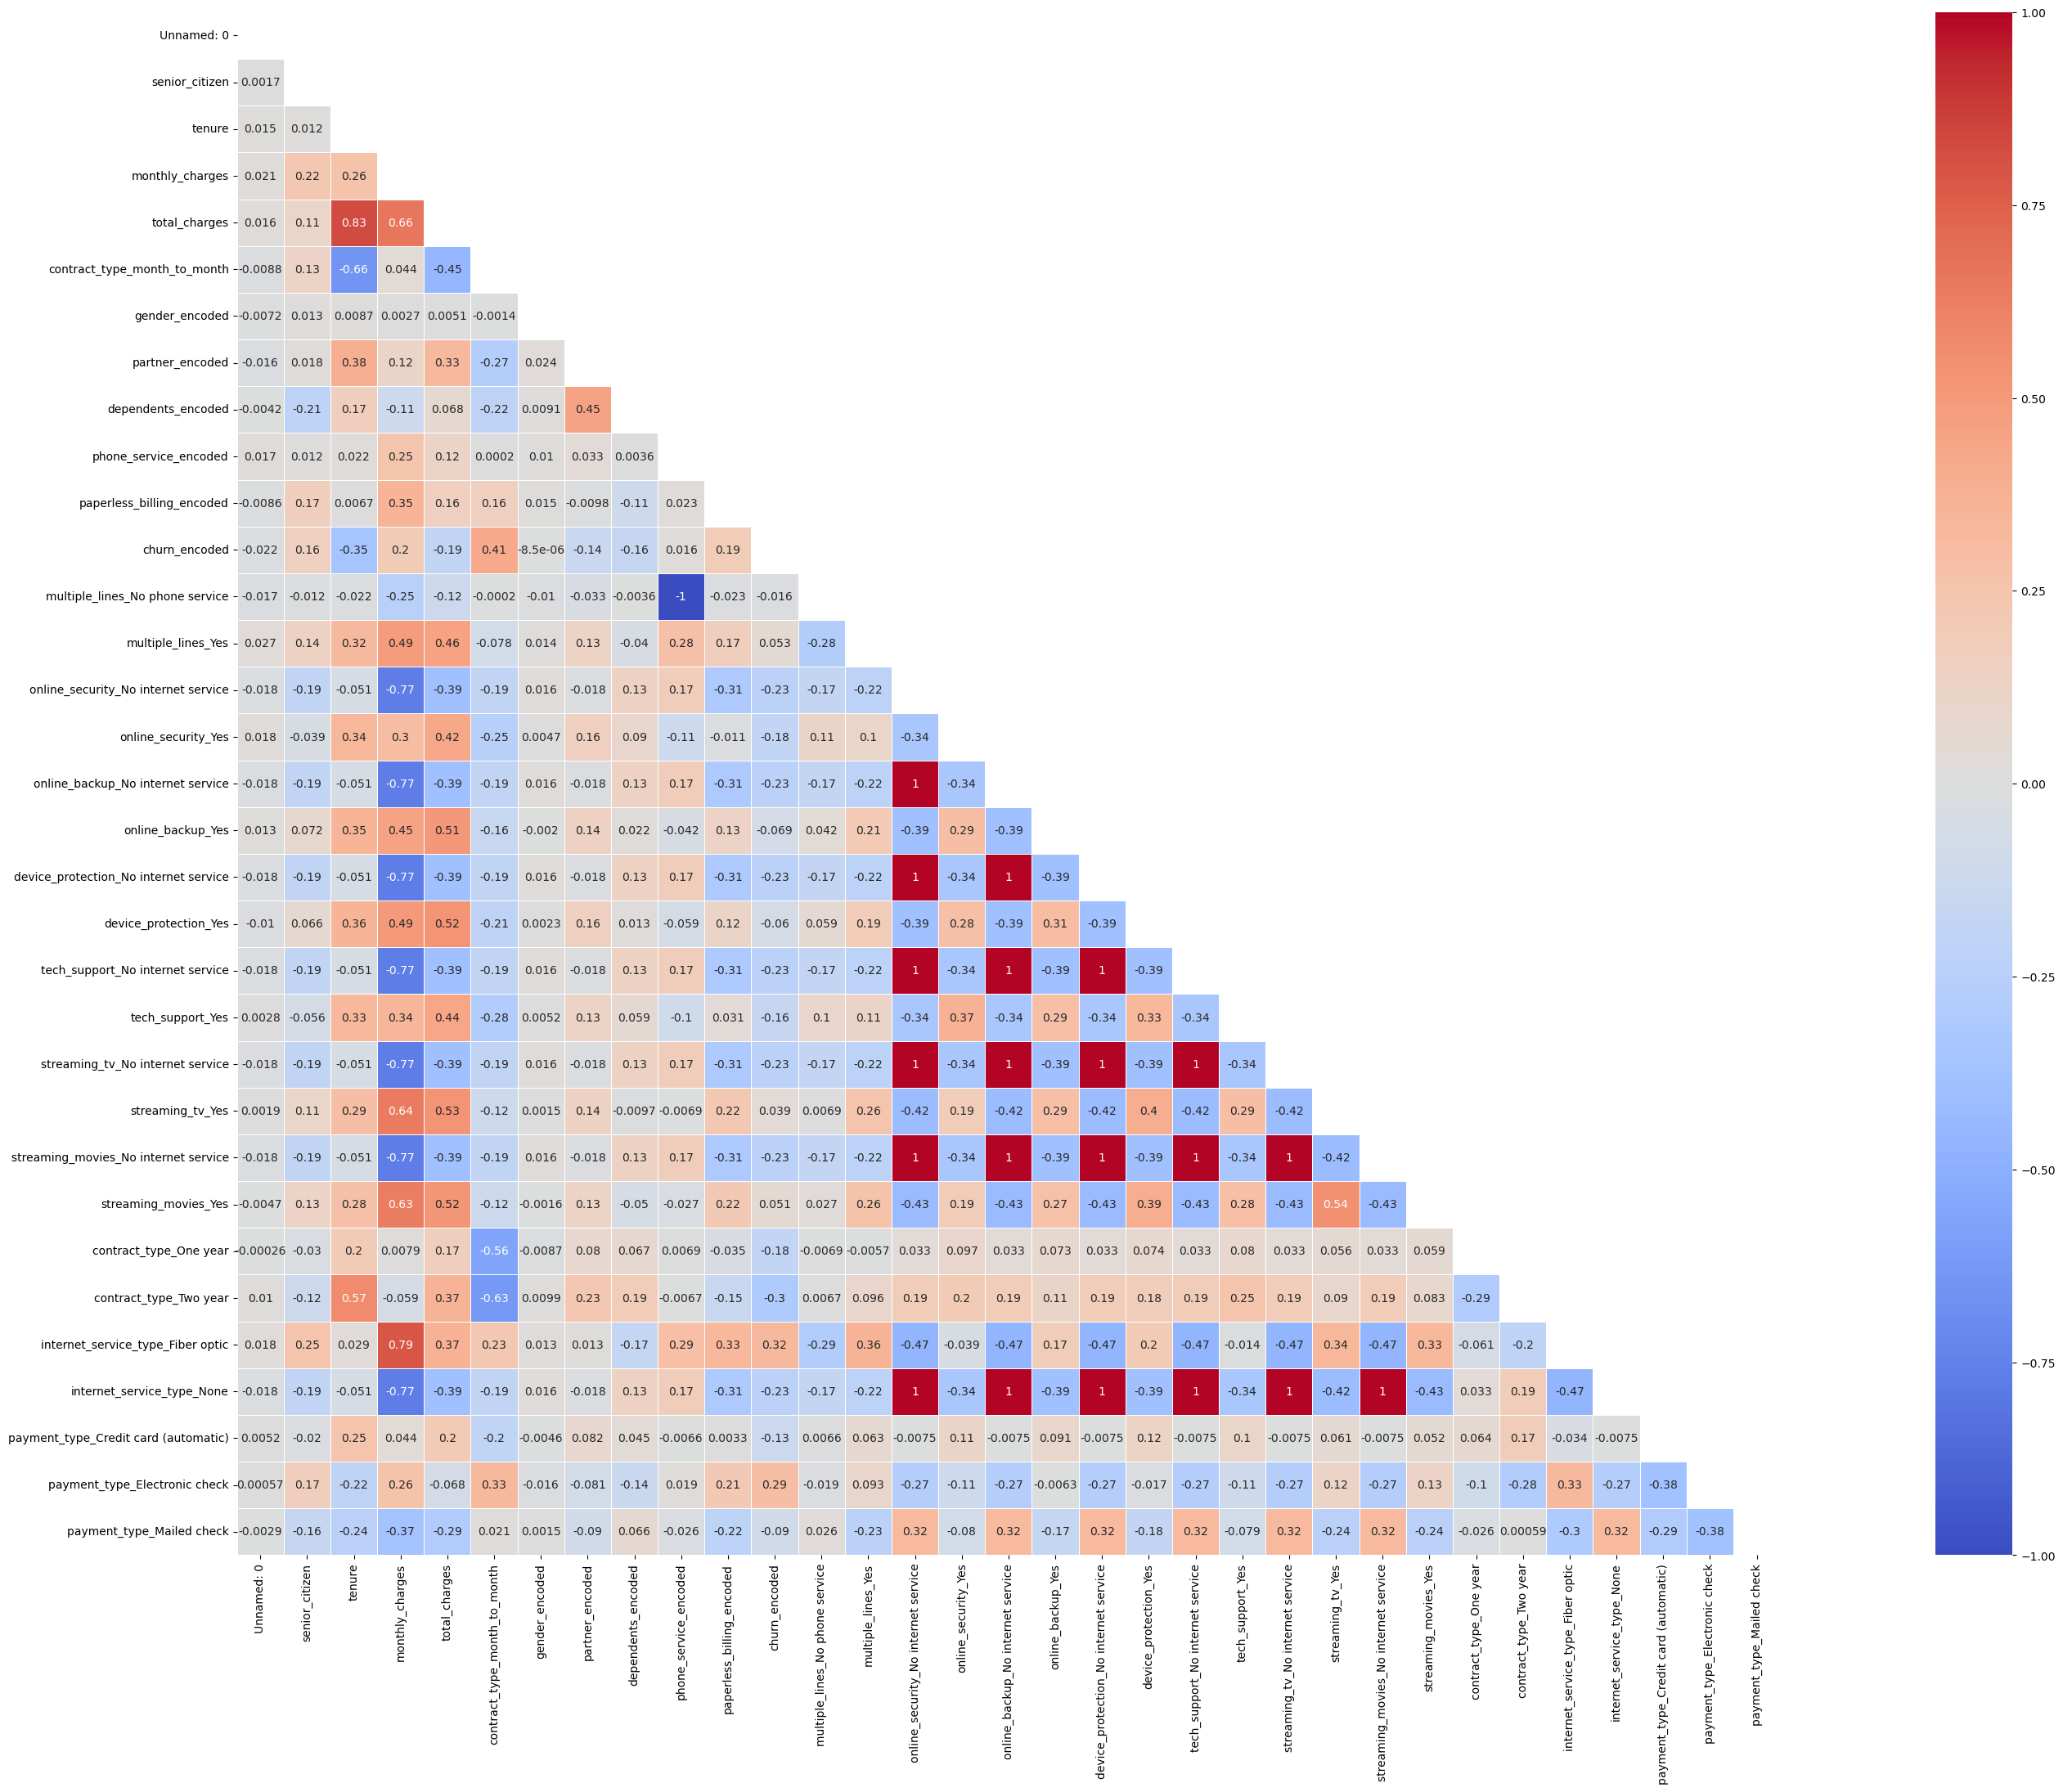

In [126]:
#explore continuous variables in the dataframe
explore_utils.plot_heatmap(train)

GENDER


,gender,Count,Frequency
0,Male,1976,0.501905
1,Female,1961,0.498095


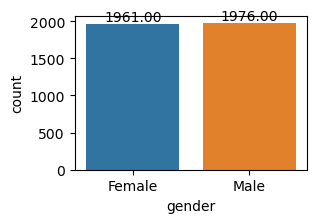


SENIOR_CITIZEN


,senior_citizen,Count,Frequency
0,0,3302,0.83871
1,1,635,0.16129


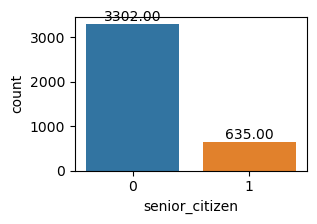


PARTNER


,partner,Count,Frequency
0,No,2027,0.514859
1,Yes,1910,0.485141


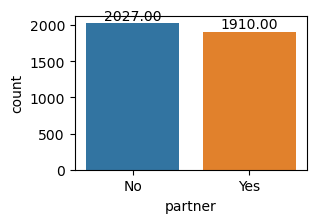


DEPENDENTS


,dependents,Count,Frequency
0,No,2745,0.697231
1,Yes,1192,0.302769


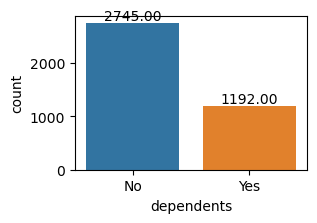


PHONE_SERVICE


,phone_service,Count,Frequency
0,Yes,3564,0.905258
1,No,373,0.094742


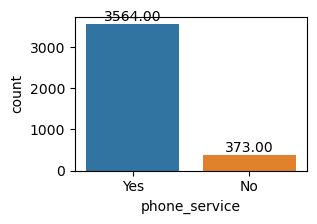


MULTIPLE_LINES


,multiple_lines,Count,Frequency
0,No,1895,0.481331
1,Yes,1669,0.423927
2,No phone service,373,0.094742


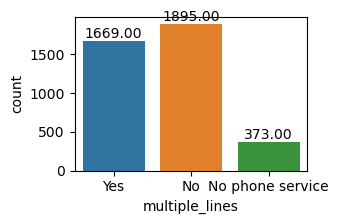


ONLINE_SECURITY


,online_security,Count,Frequency
0,No,1918,0.487173
1,Yes,1152,0.292609
2,No internet service,867,0.220218


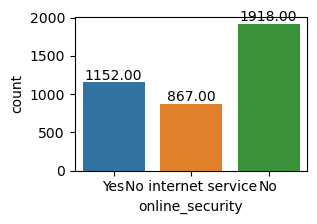


ONLINE_BACKUP


,online_backup,Count,Frequency
0,No,1697,0.431039
1,Yes,1373,0.348743
2,No internet service,867,0.220218


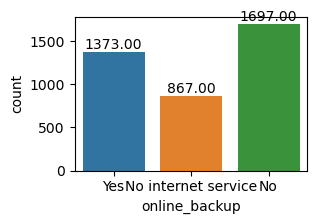


DEVICE_PROTECTION


,device_protection,Count,Frequency
0,No,1693,0.430023
1,Yes,1377,0.349759
2,No internet service,867,0.220218


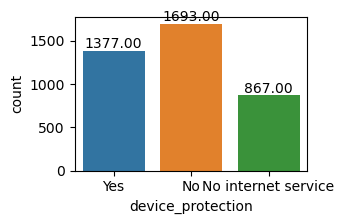


TECH_SUPPORT


,tech_support,Count,Frequency
0,No,1931,0.490475
1,Yes,1139,0.289307
2,No internet service,867,0.220218


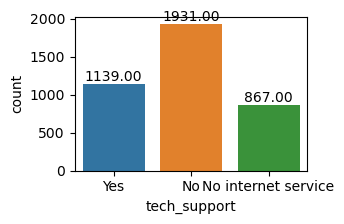


STREAMING_TV


,streaming_tv,Count,Frequency
0,No,1549,0.393447
1,Yes,1521,0.386335
2,No internet service,867,0.220218


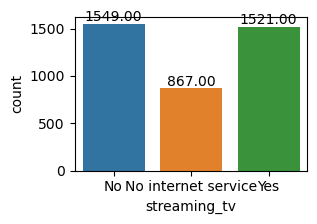


STREAMING_MOVIES


,streaming_movies,Count,Frequency
0,Yes,1541,0.391415
1,No,1529,0.388367
2,No internet service,867,0.220218


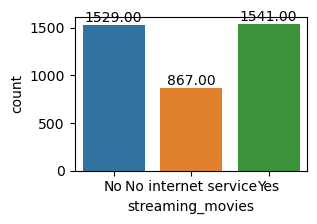


PAPERLESS_BILLING


,paperless_billing,Count,Frequency
0,Yes,2324,0.590297
1,No,1613,0.409703


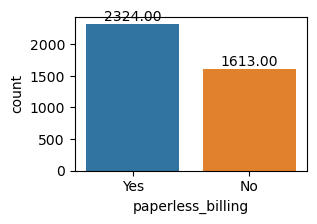


CHURN


,churn,Count,Frequency
0,No,2891,0.734315
1,Yes,1046,0.265685


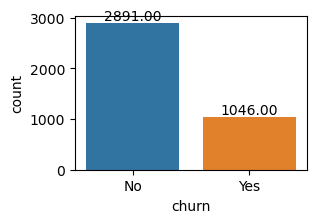


PAYMENT_TYPE


,payment_type,Count,Frequency
0,Electronic check,1289,0.327407
1,Credit card (automatic),895,0.227330
2,Mailed check,891,0.226314
3,Bank transfer (automatic),862,0.218948


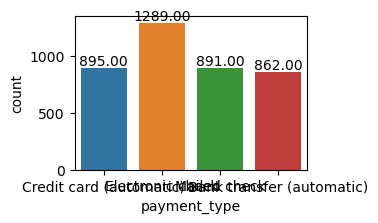


CONTRACT_TYPE


,contract_type,Count,Frequency
0,Month-to-month,2165,0.549911
1,Two year,957,0.243078
2,One year,815,0.207010


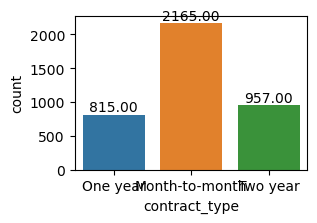


INTERNET_SERVICE_TYPE


,internet_service_type,Count,Frequency
0,Fiber optic,1722,0.437389
1,DSL,1348,0.342393
2,None,867,0.220218


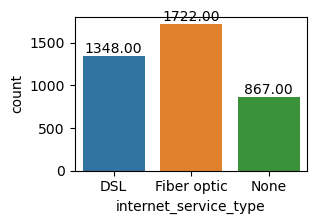


CONTRACT_TYPE_MONTH_TO_MONTH


,contract_type_month_to_month,Count,Frequency
0,1,2165,0.549911
1,0,1772,0.450089


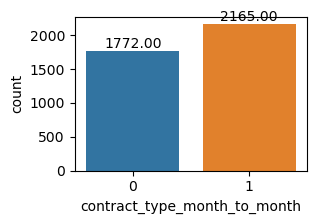


GENDER_ENCODED


,gender_encoded,Count,Frequency
0,0,1976,0.501905
1,1,1961,0.498095


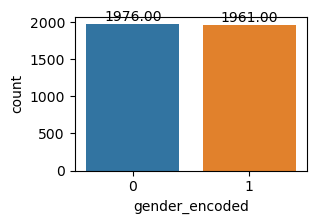


PARTNER_ENCODED


,partner_encoded,Count,Frequency
0,0,2027,0.514859
1,1,1910,0.485141


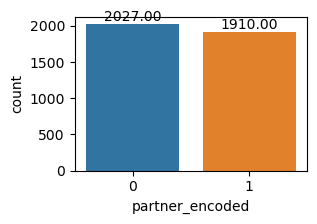


DEPENDENTS_ENCODED


,dependents_encoded,Count,Frequency
0,0,2745,0.697231
1,1,1192,0.302769


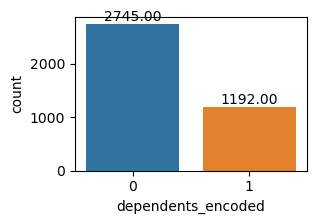


PHONE_SERVICE_ENCODED


,phone_service_encoded,Count,Frequency
0,1,3564,0.905258
1,0,373,0.094742


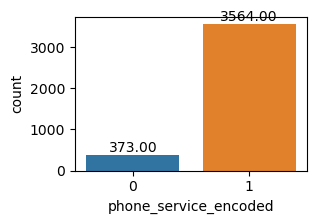


PAPERLESS_BILLING_ENCODED


,paperless_billing_encoded,Count,Frequency
0,1,2324,0.590297
1,0,1613,0.409703


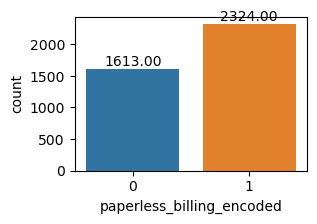


CHURN_ENCODED


,churn_encoded,Count,Frequency
0,0,2891,0.734315
1,1,1046,0.265685


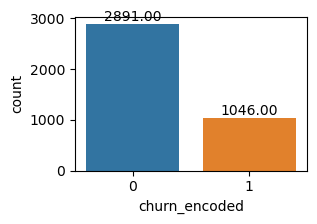


MULTIPLE_LINES_NO PHONE SERVICE


,multiple_lines_No phone service,Count,Frequency
0,0,3564,0.905258
1,1,373,0.094742


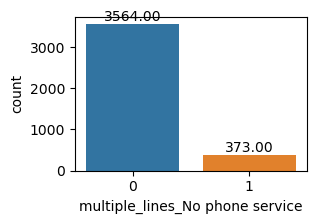


MULTIPLE_LINES_YES


,multiple_lines_Yes,Count,Frequency
0,0,2268,0.576073
1,1,1669,0.423927


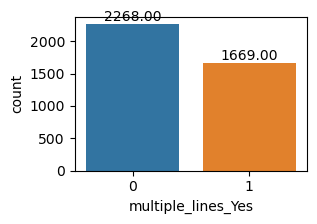


ONLINE_SECURITY_NO INTERNET SERVICE


,online_security_No internet service,Count,Frequency
0,0,3070,0.779782
1,1,867,0.220218


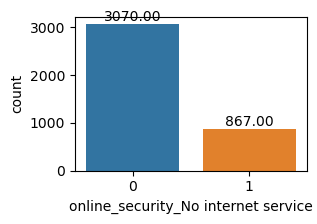


ONLINE_SECURITY_YES


,online_security_Yes,Count,Frequency
0,0,2785,0.707391
1,1,1152,0.292609


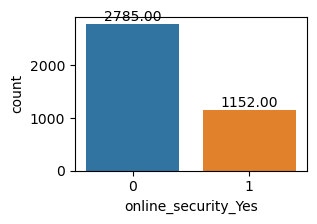


ONLINE_BACKUP_NO INTERNET SERVICE


,online_backup_No internet service,Count,Frequency
0,0,3070,0.779782
1,1,867,0.220218


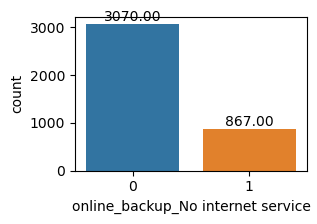


ONLINE_BACKUP_YES


,online_backup_Yes,Count,Frequency
0,0,2564,0.651257
1,1,1373,0.348743


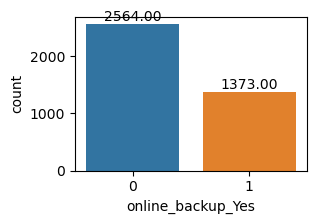


DEVICE_PROTECTION_NO INTERNET SERVICE


,device_protection_No internet service,Count,Frequency
0,0,3070,0.779782
1,1,867,0.220218


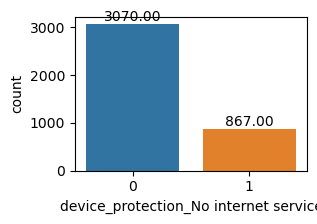


DEVICE_PROTECTION_YES


,device_protection_Yes,Count,Frequency
0,0,2560,0.650241
1,1,1377,0.349759


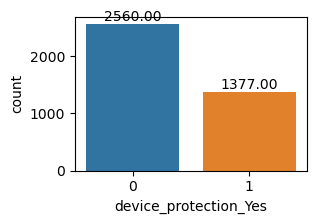


TECH_SUPPORT_NO INTERNET SERVICE


,tech_support_No internet service,Count,Frequency
0,0,3070,0.779782
1,1,867,0.220218


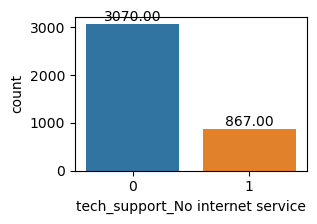


TECH_SUPPORT_YES


,tech_support_Yes,Count,Frequency
0,0,2798,0.710693
1,1,1139,0.289307


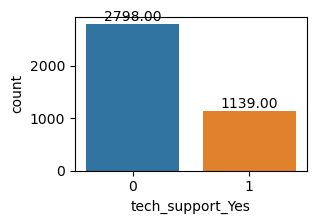


STREAMING_TV_NO INTERNET SERVICE


,streaming_tv_No internet service,Count,Frequency
0,0,3070,0.779782
1,1,867,0.220218


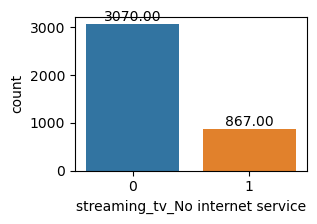


STREAMING_TV_YES


,streaming_tv_Yes,Count,Frequency
0,0,2416,0.613665
1,1,1521,0.386335


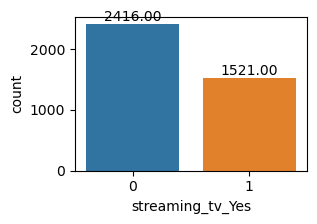


STREAMING_MOVIES_NO INTERNET SERVICE


,streaming_movies_No internet service,Count,Frequency
0,0,3070,0.779782
1,1,867,0.220218


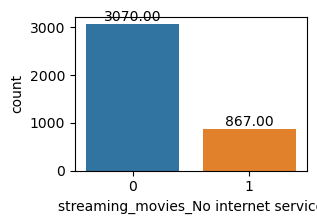


STREAMING_MOVIES_YES


,streaming_movies_Yes,Count,Frequency
0,0,2396,0.608585
1,1,1541,0.391415


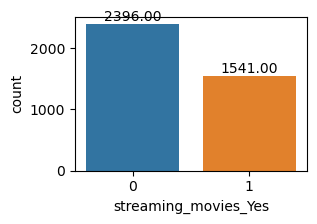


CONTRACT_TYPE_ONE YEAR


,contract_type_One year,Count,Frequency
0,0,3122,0.79299
1,1,815,0.20701


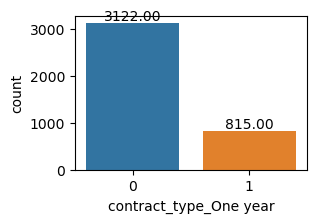


CONTRACT_TYPE_TWO YEAR


,contract_type_Two year,Count,Frequency
0,0,2980,0.756922
1,1,957,0.243078


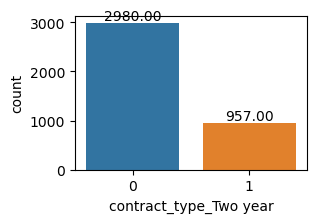


INTERNET_SERVICE_TYPE_FIBER OPTIC


,internet_service_type_Fiber optic,Count,Frequency
0,0,2215,0.562611
1,1,1722,0.437389


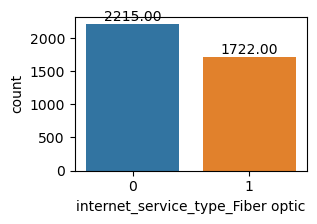


INTERNET_SERVICE_TYPE_NONE


,internet_service_type_None,Count,Frequency
0,0,3070,0.779782
1,1,867,0.220218


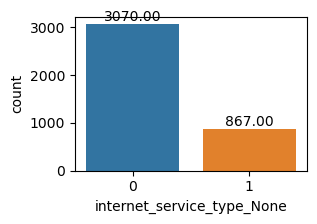


PAYMENT_TYPE_CREDIT CARD (AUTOMATIC)


,payment_type_Credit card (automatic),Count,Frequency
0,0,3042,0.77267
1,1,895,0.22733


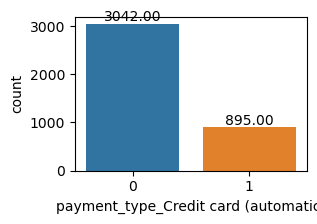


PAYMENT_TYPE_ELECTRONIC CHECK


,payment_type_Electronic check,Count,Frequency
0,0,2648,0.672593
1,1,1289,0.327407


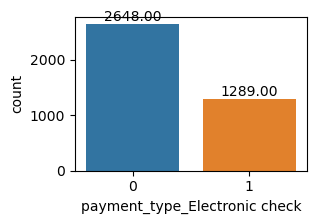


PAYMENT_TYPE_MAILED CHECK


,payment_type_Mailed check,Count,Frequency
0,0,3046,0.773686
1,1,891,0.226314


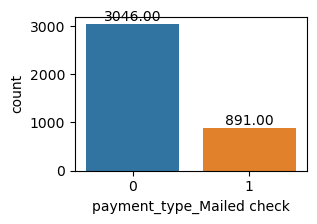

In [127]:
#univariate exploration of categorical columns in the dataset
explore_utils.explore_univariate_categorical_cols(train, cat_cols= cat_cols)

In [ ]:
# highest correlations
# fiber optic service type
# electronic check payment type
# two year contract type

In [128]:
stats_test_list = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

alpha = .05

for ele in stats_test_list:
    ctab = pd.crosstab(train.churn_encoded, train[ele])
    chi, p, _, _ = scipy.stats.chi2_contingency(ctab)
    print(f'''
Results for {ele}:
    
R value equals {round(chi, 3)}
P-value equals {p}
    ''')
    
    if p < alpha:
        print(f'The p value is lower than the alpha. We can reject the null hypothesis. There is a meaningful relationship between \n{ele} and churn\n\n ----------------\n')
    else:
        print(f'The p value is higher than the alpha. We cannot reject the null hypothesis. There is no meaningful relationship between \n{ele} and churn\n\n ----------------\n')
        


Results for internet_service_type_Fiber optic:
    
R value equals 405.921
P-value equals 2.831419548361709e-90
    
The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between 
internet_service_type_Fiber optic and churn

 ----------------


Results for payment_type_Electronic check:
    
R value equals 334.98
P-value equals 7.910587922260644e-75
    
The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between 
payment_type_Electronic check and churn

 ----------------


Results for contract_type_Two year:
    
R value equals 354.286
P-value equals 4.941935969249593e-79
    
The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between 
contract_type_Two year and churn

 ----------------


Results for contract_type_month_to_month:
    
R value equals 649.133
P-value equals 3.4484593947893894e-143
    
The p value is lower than alpha. W

In [ ]:
# the columns: 'internet_service_type_Fiber optic', 'payment_type_Electronic check', 
# 'contract_type_Two year', and 'contract_type_month_to_month' have all been shown to have a meaningful relationship
# with churn through chi squared statistical testing. These features are being selected to take to modeling

Categorical feature (integer-type) "correlations" (Pearson R) to churn_encoded:


churn_encoded                            1.000000
contract_type_month_to_month             0.406632
internet_service_type_Fiber optic        0.321678
payment_type_Electronic check            0.292306
paperless_billing_encoded                0.190075
senior_citizen                           0.159932
multiple_lines_Yes                       0.053031
streaming_movies_Yes                     0.051348
streaming_tv_Yes                         0.038849
phone_service_encoded                    0.015906
gender_encoded                          -0.000008
multiple_lines_No phone service         -0.015906
device_protection_Yes                   -0.060108
online_backup_Yes                       -0.068519
payment_type_Mailed check               -0.090324
payment_type_Credit card (automatic)    -0.127314
partner_encoded                         -0.143203
tech_support_Yes                        -0.159305
dependents_encoded                      -0.163579
online_security_Yes                     -0.180834


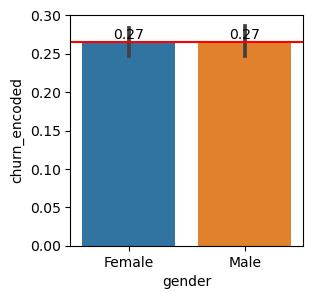

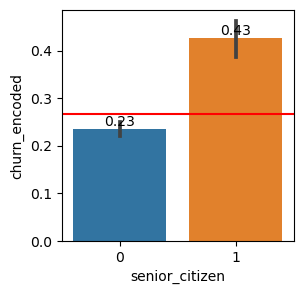

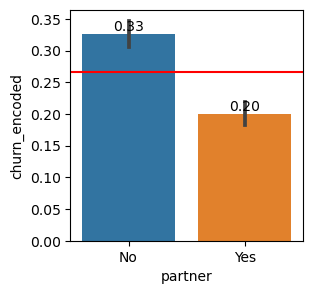

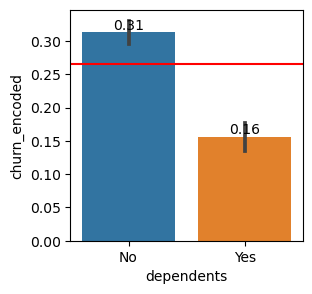

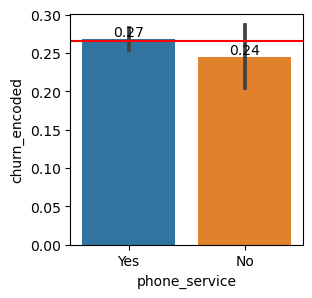

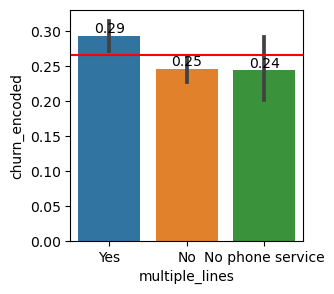

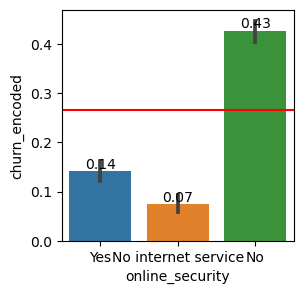

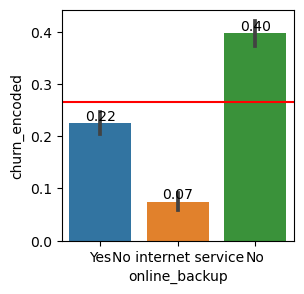

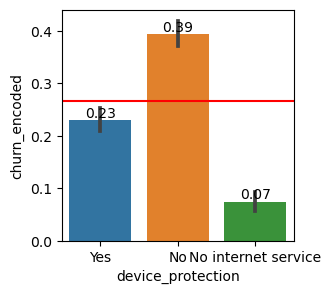

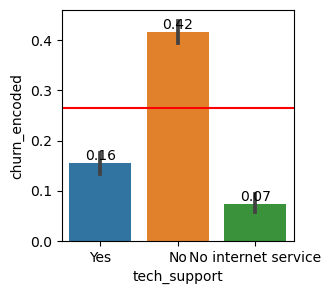

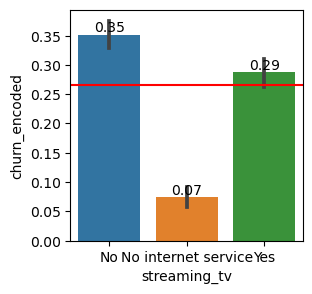

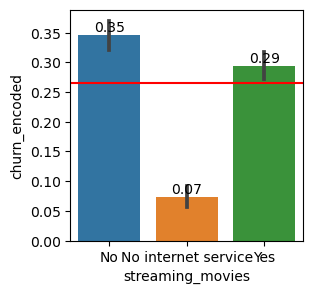

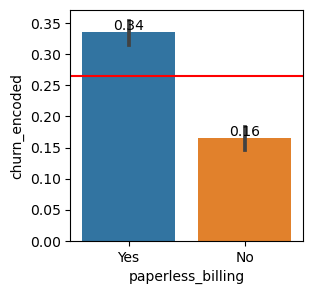

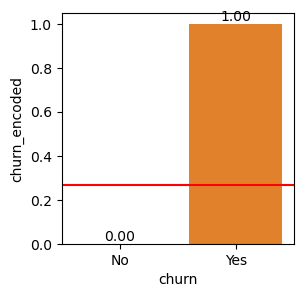

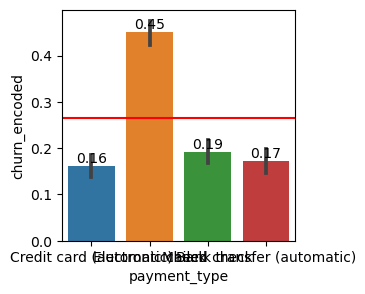

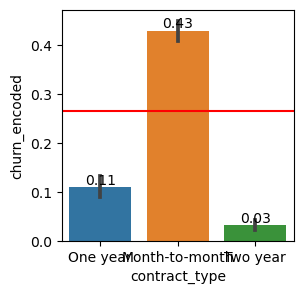

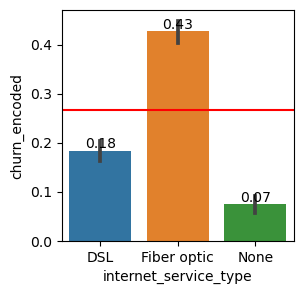

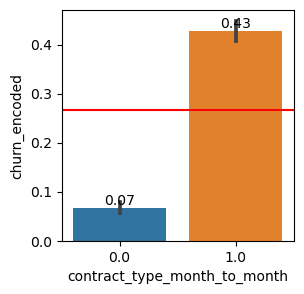

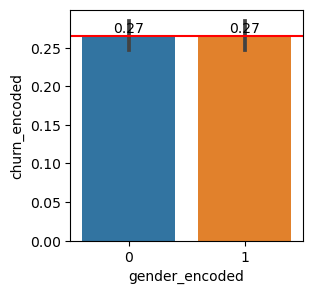

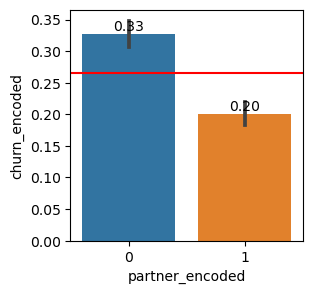

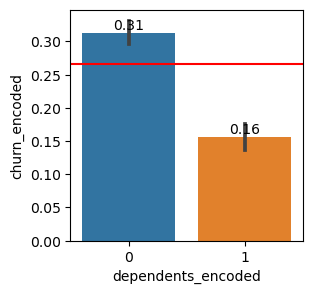

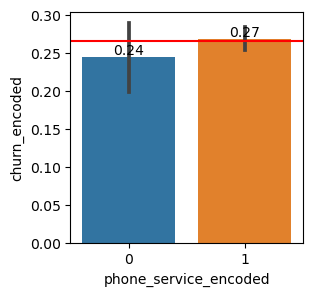

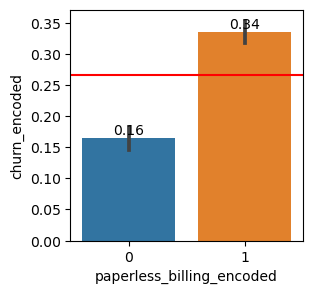

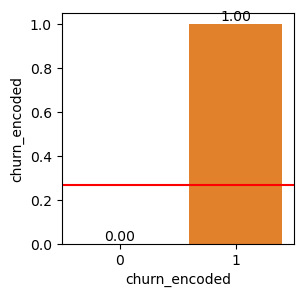

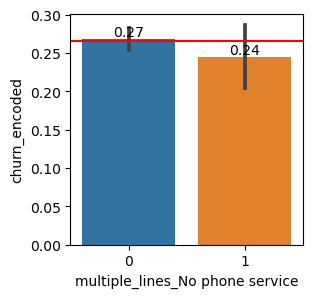

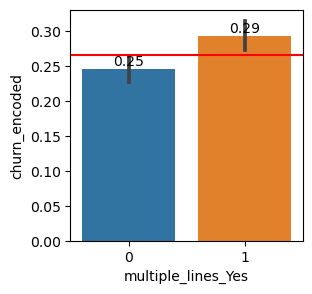

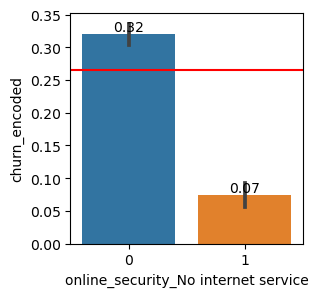

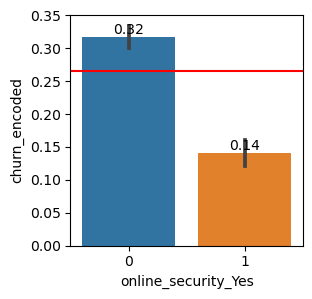

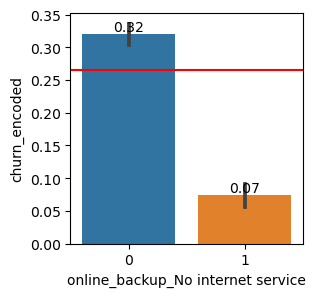

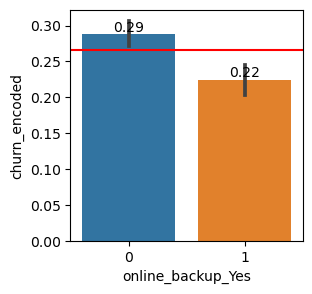

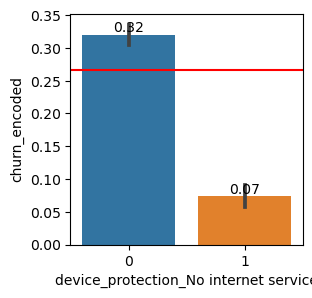

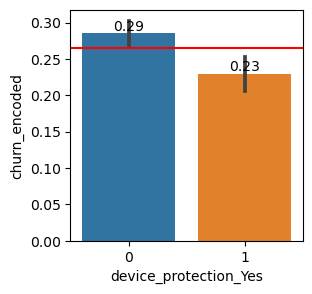

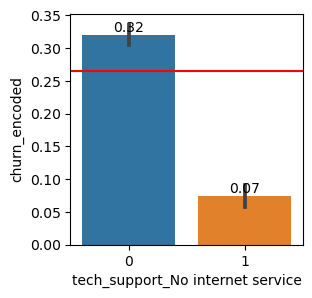

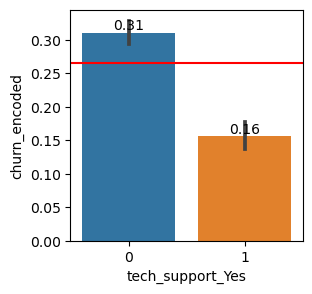

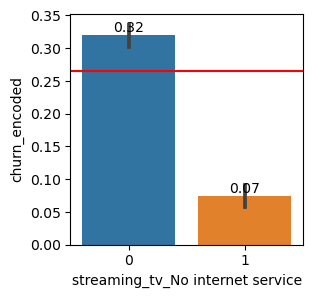

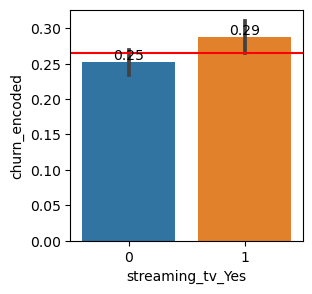

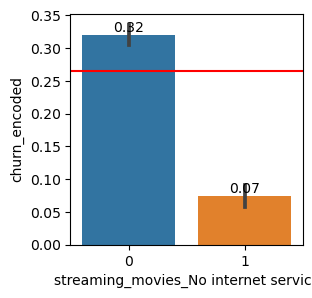

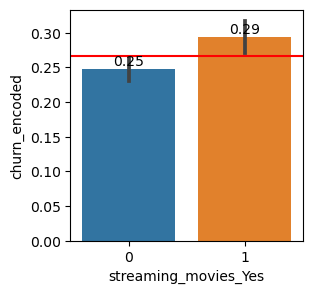

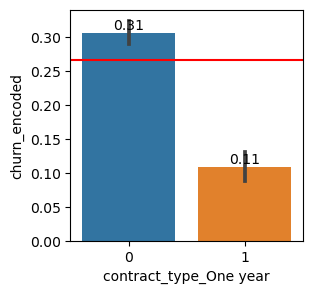

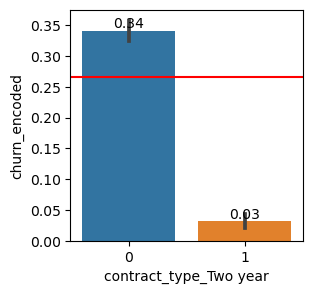

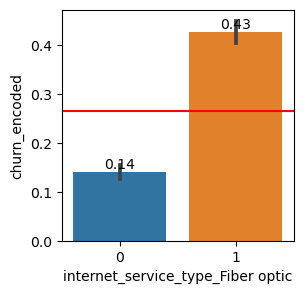

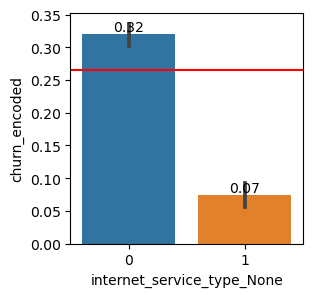

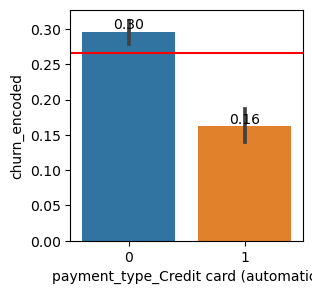

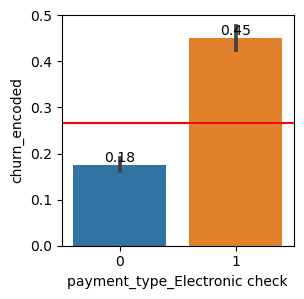

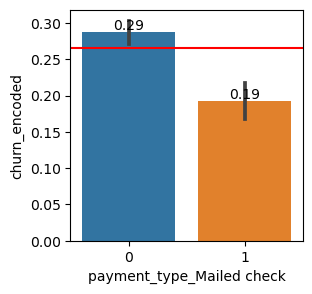

/Users/Scott/codeup-data-science/classification-exercises/classification_project/explore_utils.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
/Users/Scott/codeup-data-science/classification-exercises/classification_project/explore_utils.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, cmap='coolwarm',


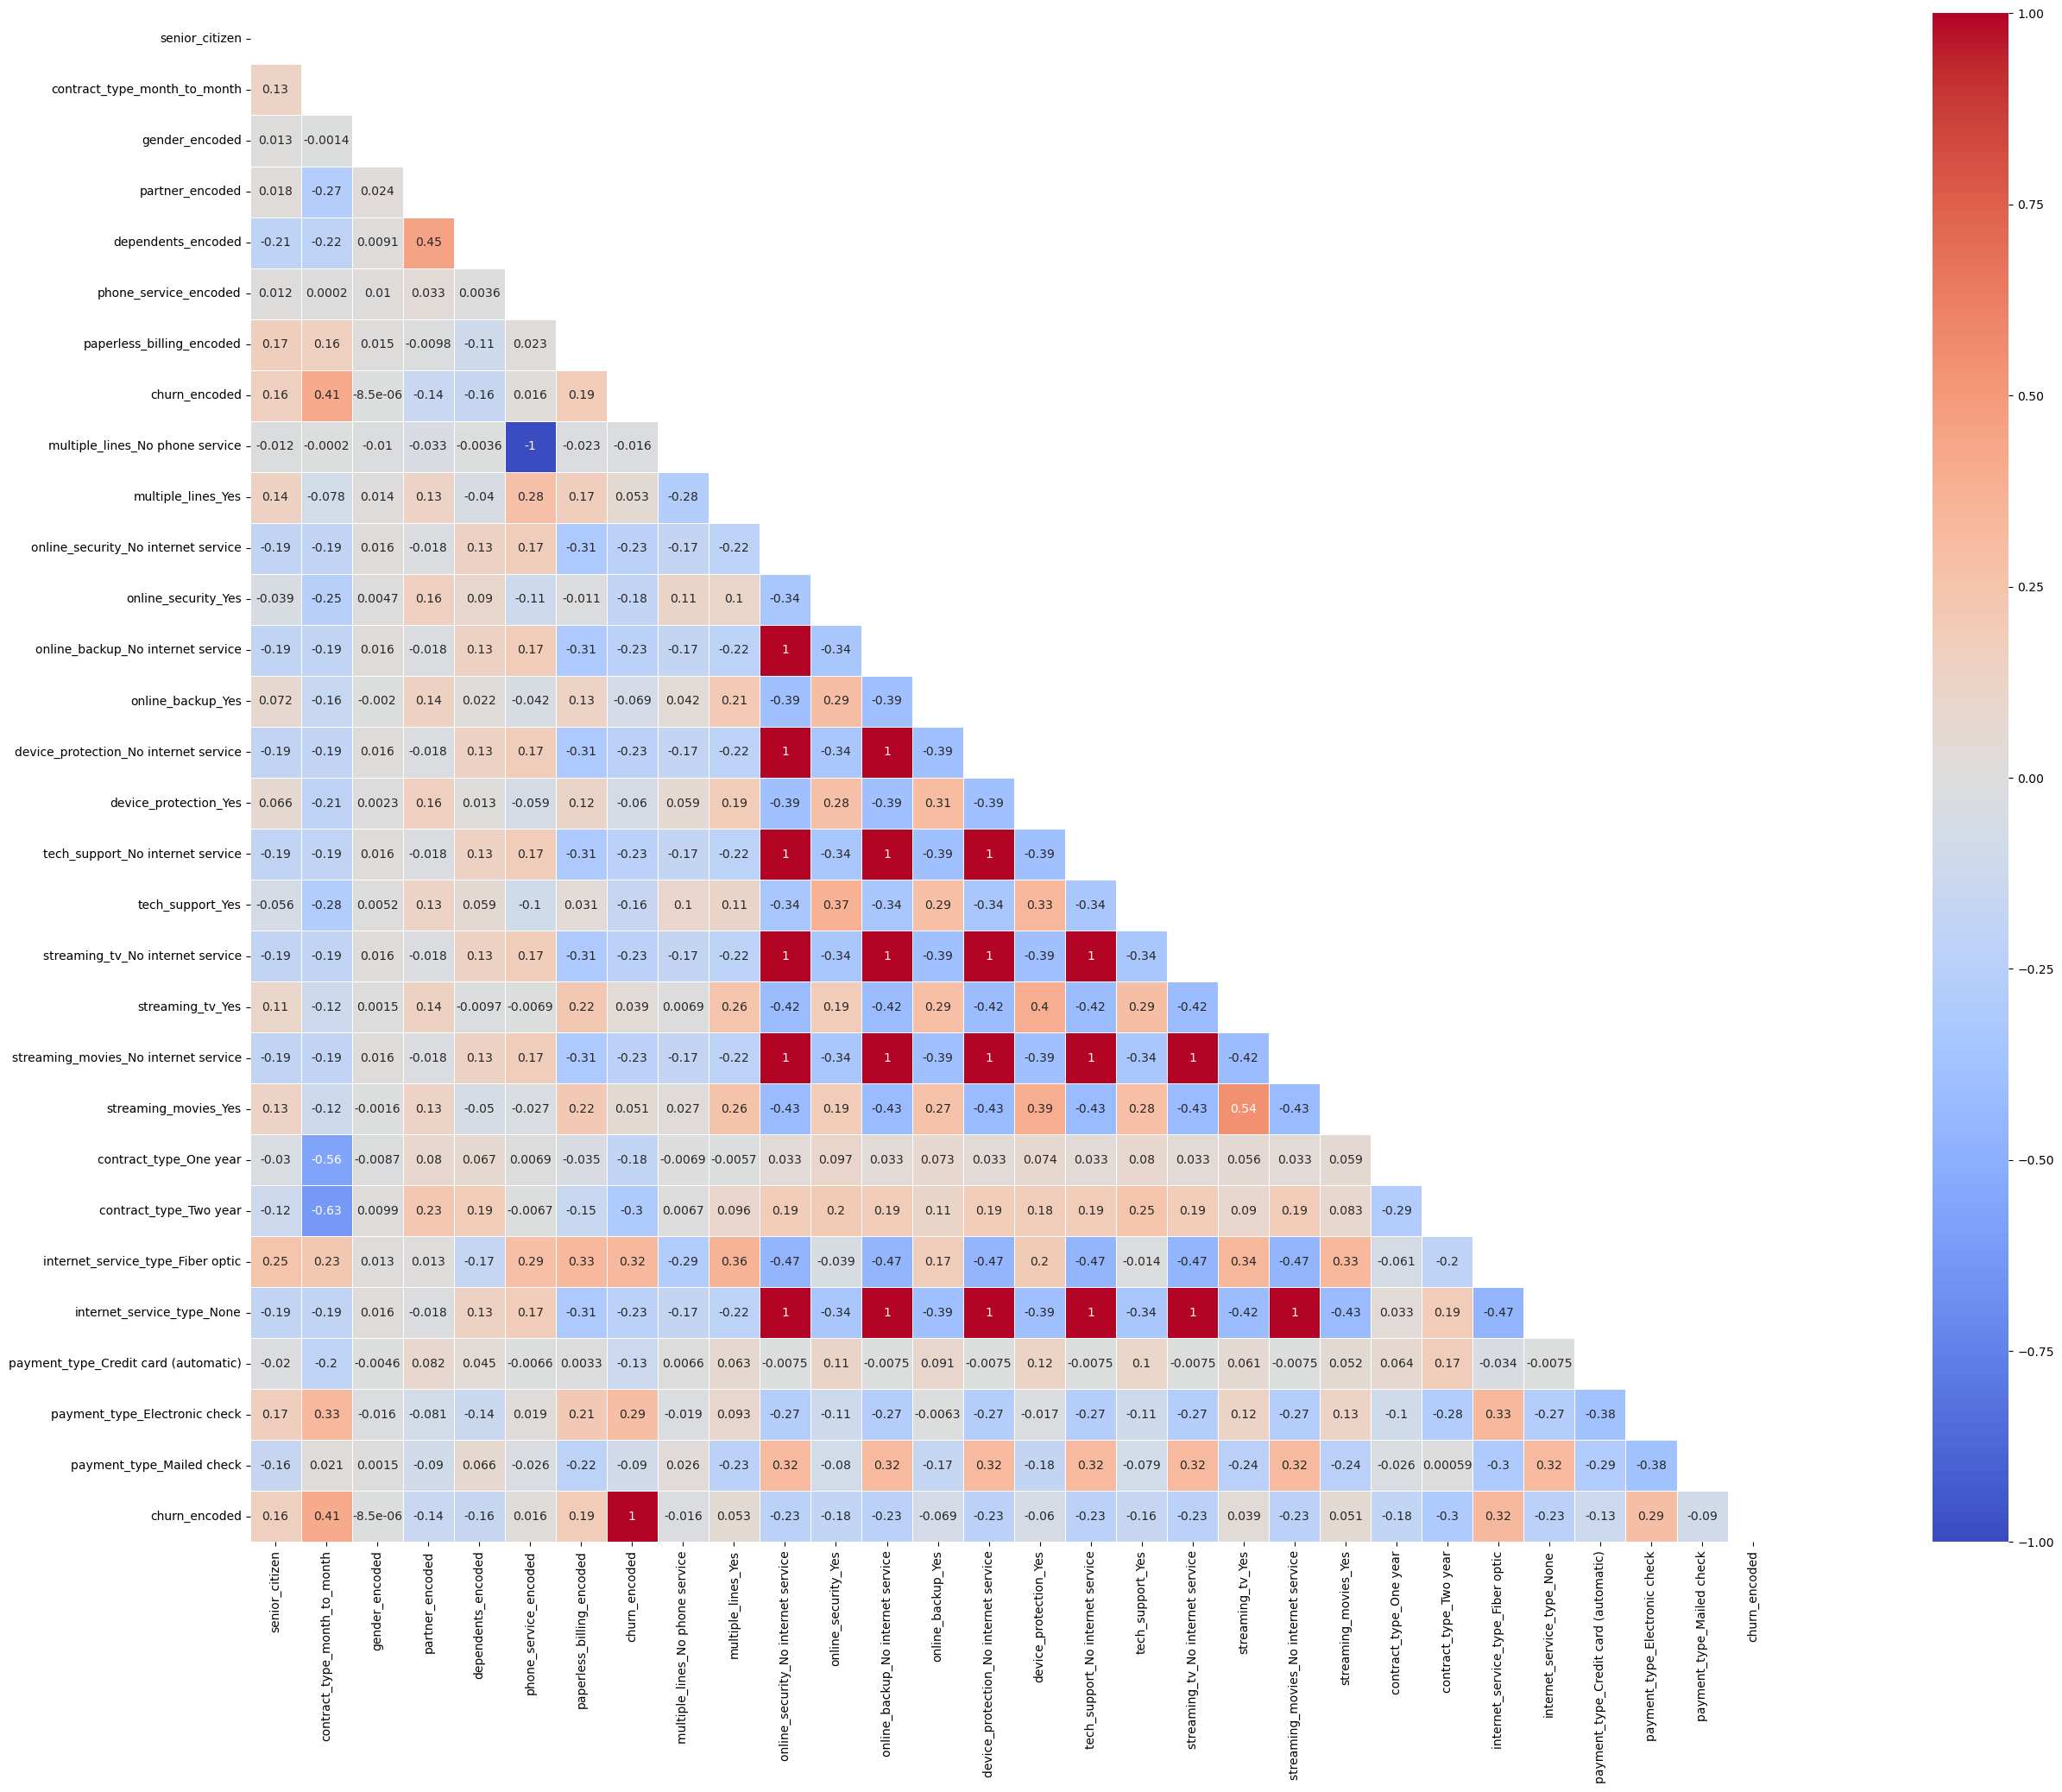

In [69]:
explore_utils.explore_bivariate_cat_to_cat_target(train, 'churn_encoded')

# Step 5. Model

Deliverables:
Predictions (.csv).

3 columns: customer_id, probability of churn, and prediction of churn. (1=churn, 0=not_churn).

These predictions should be from your best performing model ran on X_test.

Note that the order of the y_pred and y_proba are numpy arrays coming from running the model on X_test. The order of those values will match the order of the rows in X_test, so you can obtain the customer_id from X_test and concatenate these values together into a dataframe to write to CSV.

In [129]:
#establish the baseline model

In [130]:
train.churn_encoded.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [131]:
train['baseline_prediction'] = 0
train.baseline_prediction

5919    0
1915    0
5054    0
2355    0
6279    0
       ..
394     0
3763    0
3444    0
1002    0
4192    0
Name: baseline_prediction, Length: 3937, dtype: int64

In [132]:
train.head()

,Unnamed: 0,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,baseline_prediction
5919,5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,...,0,0,1,0,0,0,1,0,0,0
1915,1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,...,0,0,1,0,1,0,1,0,0,0
5054,5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,...,1,0,0,0,0,1,0,1,0,0
2355,2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,...,1,0,0,0,0,1,0,0,1,0
6279,6279,Male,1,No,No,20,Yes,No,Yes,No,...,0,0,1,0,0,0,0,0,1,0


In [133]:
stats_test_list = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

In [135]:
train.contract_type_month_to_month.astype(int)

5919    0
1915    0
5054    1
2355    1
6279    0
       ..
394     1
3763    1
3444    0
1002    1
4192    1
Name: contract_type_month_to_month, Length: 3937, dtype: int64

In [136]:
train[stats_test_list].head()

,internet_service_type_Fiber optic,payment_type_Electronic check,contract_type_Two year,contract_type_month_to_month
5919,0,0,0,0
1915,1,0,0,0
5054,0,1,0,1
2355,0,0,0,1
6279,0,0,0,0


In [157]:
stats_test_list = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

X_train = train[stats_test_list]
y_train = train.churn_encoded

X_validate = validate[stats_test_list]
y_validate = validate.churn_encoded

X_test = test[stats_test_list]
y_test = test.churn_encoded

In [164]:
# Evaluate baseline accuracy
baseline_acc = (y_train == 0).mean()
print(f'Baseline accuracy is {round(baseline_acc, 2)}%')

Baseline accuracy is 0.73%


In [ ]:
# build a knn classification model

In [165]:
for i in range(1,21):
    #Make the thing
    knn = knc(n_neighbors=i) 
    
    #Train
    #Fit the thing
    knn.fit(X_train, y_train)
    #Make predictions
    y_pred = knn.predict(X_train)
    #Evaluate the model accuracy
    t_score = knn.score(X_train, y_train)
    
    #Validate
    #Fit the thing
    knn.fit(X_validate, y_validate)
    #Make predictions
    y_pred = knn.predict(X_validate)
    #Evaluate the model accuracy
    t_score_val = knn.score(X_validate, y_validate)
    
    print(f'When k = {i},\n training accuracy = {round(t_score, 2)},\n validate accuracy = {round(t_score_val, 2)},\n difference = {round(abs(t_score - t_score_val), 2)}')
    #print(classification_report(y_train, y_pred))
    if t_score_val < baseline_acc:
        print('This model does not outperform the baseline.')
    else:
        print('This model outperforms the baseline.')
    print('\n\n----------\n')

When k = 1,
 training accuracy = 0.76,
 validate accuracy = 0.67,
 difference = 0.09
This model does not outperform the baseline.


----------

When k = 2,
 training accuracy = 0.72,
 validate accuracy = 0.73,
 difference = 0.01
This model does not outperform the baseline.


----------

When k = 3,
 training accuracy = 0.73,
 validate accuracy = 0.73,
 difference = 0.0
This model does not outperform the baseline.


----------

When k = 4,
 training accuracy = 0.77,
 validate accuracy = 0.73,
 difference = 0.05
This model does not outperform the baseline.


----------

When k = 5,
 training accuracy = 0.77,
 validate accuracy = 0.7,
 difference = 0.07
This model does not outperform the baseline.


----------

When k = 6,
 training accuracy = 0.77,
 validate accuracy = 0.73,
 difference = 0.05
This model does not outperform the baseline.


----------

When k = 7,
 training accuracy = 0.77,
 validate accuracy = 0.7,
 difference = 0.07
This model does not outperform the baseline.


-------

The knn model does not beat the baseline at predicting churn with these columns

In [ ]:
# build a decision tree classification model

In [166]:
clf = dtc(max_depth= 3, random_state=123)

In [167]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [168]:
clf.classes_

array([0, 1])

In [169]:
y_pred = clf.predict(X_train)

In [170]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[:5]

array([[0.93885602, 0.06114398],
       [0.81168831, 0.18831169],
       [0.66346154, 0.33653846],
       [0.76128093, 0.23871907],
       [0.93885602, 0.06114398]])

In [173]:
print('Training accuracy {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Validate accuracy {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Training accuracy 0.78
Validate accuracy 0.76


In [179]:
for i in range(1,21):
    clf = dtc(max_depth= i, random_state=123)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    val_acc = clf.score(X_validate, y_validate)
    print(f'''
When max_depth is {i},
Training accuracy is {round(train_acc, 2)},
Validate accuracy is {round(val_acc, 2)}
Difference = {round(abs(train_acc - val_acc), 2)}
''')
    if val_acc > baseline_acc:
        print('This model outperforms baseline.')
    else:
        print('This model does not outperform baseline.')
    print('-------------\n')


When max_depth is 1,
Training accuracy is 0.73,
Validate accuracy is 0.73
Difference = 0.0

This model does not outperform baseline.
-------------


When max_depth is 2,
Training accuracy is 0.77,
Validate accuracy is 0.74
Difference = 0.03

This model outperforms baseline.
-------------


When max_depth is 3,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When max_depth is 4,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When max_depth is 5,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When max_depth is 6,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When max_depth is 7,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


The decision tree model outperforms the baseline.

In [ ]:
# build a random forest classification model

In [180]:
rf = rfc(min_samples_leaf=1, max_depth=10, random_state=123)

In [181]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [182]:
rf.score(X_train, y_train)

0.778003556007112

In [183]:
rf.score(X_validate, y_validate)

0.764218009478673

In [185]:
for i in range(1,11):
    rf = rfc(min_samples_leaf=i, max_depth=10, random_state=123)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    print(f'''
When min_sample_leaf is {i},
Training accuracy is {round(train_acc, 2)},
Validate accuracy is {round(val_acc, 2)}
Difference = {round(abs(train_acc - val_acc), 2)}
''')
    if val_acc > baseline_acc:
        print('This model outperforms baseline.')
    else:
        print('This model does not outperform baseline.')
    print('-------------\n')


When min_sample leaf is 1,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When min_sample leaf is 2,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When min_sample leaf is 3,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When min_sample leaf is 4,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When min_sample leaf is 5,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When min_sample leaf is 6,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model outperforms baseline.
-------------


When min_sample leaf is 7,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

This model o

No significant difference when the min_sample_leaf hyperparameter is tuned

In [3]:
for i in range(1,21):
    rf = rfc(min_samples_leaf=i, max_depth=10, random_state=123)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    print(f'''
When max_depth is {i},
Training accuracy is {round(train_acc, 2)},
Validate accuracy is {round(val_acc, 2)}
Difference = {round(abs(train_acc - val_acc), 2)}
''')
    if val_acc > baseline_acc:
        print('This model outperforms baseline.')
    else:
        print('This model does not outperform baseline.')
    print('-------------\n')

NameError: name 'rfc' is not defined

No significant difference when the max_depth hyperparameter is tuned

The random forest model outperforms baseline

### Construct a ML classification model that accurately predicts customer churn

In [2]:
# Assuming you have a trained random forest model named 'rf_model'
# and a feature matrix named 'X_test' for which you want to make predictions

# Generate predictions using the random forest model


NameError: name 'rf' is not defined

### Present your process and findings to the lead data scientistm